Epoch 1/100
4/4 [==============================] - 2s 146ms/step - loss: 1.6019 - accuracy: 0.4583 - val_loss: 1.4724 - val_accuracy: 0.7333
Epoch 2/100
4/4 [==============================] - 0s 28ms/step - loss: 1.5135 - accuracy: 0.4583 - val_loss: 1.3899 - val_accuracy: 0.8667
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 1.4340 - accuracy: 0.5750 - val_loss: 1.3161 - val_accuracy: 0.8667
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 1.3819 - accuracy: 0.6083 - val_loss: 1.2497 - val_accuracy: 0.9000
Epoch 5/100
4/4 [==============================] - 0s 48ms/step - loss: 1.2637 - accuracy: 0.6500 - val_loss: 1.1896 - val_accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 59ms/step - loss: 1.2459 - accuracy: 0.6500 - val_loss: 1.1349 - val_accuracy: 0.9333
Epoch 7/100
4/4 [==============================] - 0s 45ms/step - loss: 1.2434 - accuracy: 0.6500 - val_loss: 1.0842 - val_accuracy: 0.9333
Epoch 8/100
4/4 [==

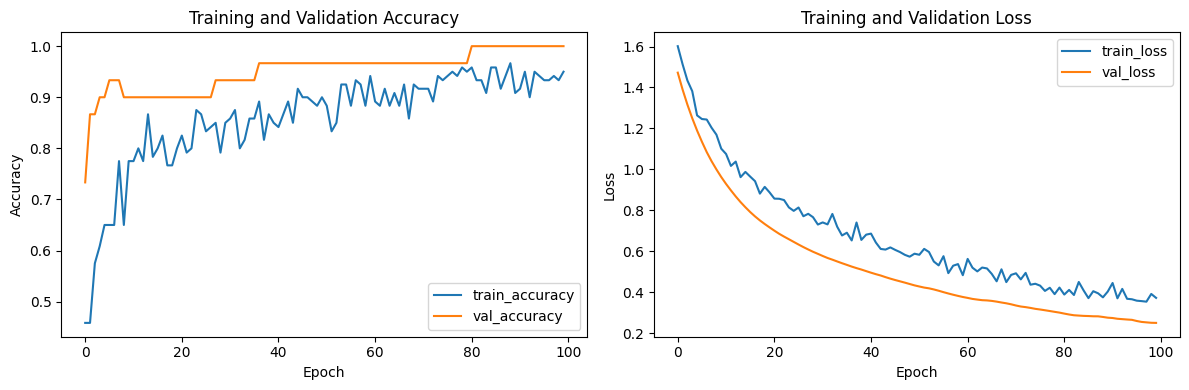

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=4, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
